<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_moons


X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_clf.score(X_train, y_train), dt_clf.score(X_test, y_test)

(1.0, 0.9666666666666667)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['entrophy','gini'],
    'max_depth' : [91, 92, 93, 94, 95],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

gsc_dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3)
gsc_dt_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entrophy', 'gini'],
                         'max_depth': [91, 92, 93, 94, 95],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
gsc_dt_clf.best_params_

{'criterion': 'gini', 'max_depth': 91, 'min_samples_leaf': 1}

In [ ]:
gsc_dt_clf.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=91)

In [ ]:
gsc_dt_clf.best_estimator_.score(X_train, y_train), gsc_dt_clf.best_estimator_.score(X_test, y_test)

(1.0, 0.9666666666666667)

# Iris Data

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH / "iris_tree.dot"),
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

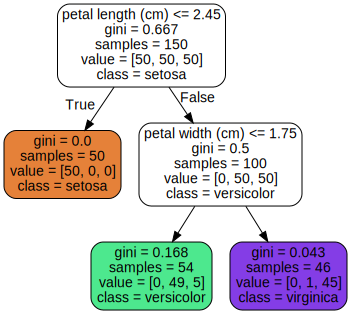

In [ ]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "iris_tree.dot")

# Estimating Class Probablities

In [ ]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularization Hyperparameters

In [ ]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [ ]:
X_moons_test, y_moons_test = make_moons(n_samples=150, noise=0.2, random_state=53)


In [ ]:
tree_clf1.score(X_moons_test, y_moons_test), tree_clf2.score(X_moons_test, y_moons_test)

(0.8666666666666667, 0.92)

# Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5             # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
tree_reg.score(X_quad, y_quad)

0.7966018355059642

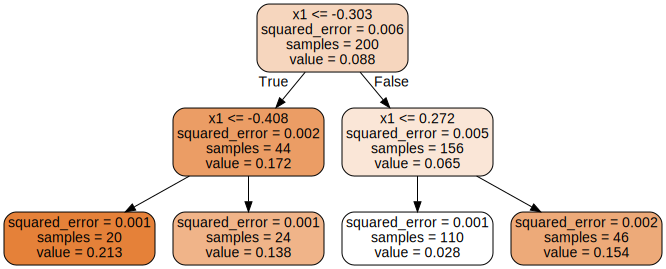

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "regression_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

Source.from_file(IMAGES_PATH / "regression_tree.dot")

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Hands On

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.7925)

In [ ]:
param_grid = {
    'max_leaf_nodes' : [5, 10, 15],
    'max_depth' : [10, 15 , 20]
}

clf_grid = GridSearchCV(clf, param_grid, cv=3)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 15, 20],
                         'max_leaf_nodes': [5, 10, 15]})

In [ ]:
clf_grid.best_params_

{'max_depth': 10, 'max_leaf_nodes': 15}

In [ ]:
clf_grid.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, random_state=42)

In [ ]:
clf_grid.best_estimator_.score(X_train, y_train), clf_grid.best_estimator_.score(X_test, y_test)

(0.86225, 0.8545)